# Milestone 1

By : Maheswara Sinatriyo

Batch : HCK-001

## Working Area

**Objectives**
* To observe the growth of Boeing in terms of aircraft order over the year.
* Explore, filter, agregate and visualize the dataset to extract usefull insight.

**Problem Statement**

Boeing is one of the biggest aircraft manufacturer in the world, it was founded in 1916 by William Boeing. In 1997 the company merged with McDonnell Douglas. The dataset contain historical data of Boeing's orders and deliveries. Thus out of all these years, I would like to see how boeing perform in terms of sales (order and delivery), and does it perform well in the last 10 years? Below are the problem breakdown:
* How does the total order looks like from all time? How does it compares with total delivery from all time?
* What aircraft model is ordered the most in the last 10 years? How does it compares with all years?
* What engine is ordered the most in the last 10 years? How does it compares with all years?
* Who in terms of company order the most aircraft in the last 10 years? How does it compares with all years?

**DATASET**

https://www.kaggle.com/datasets/nurielreuven/boeing-historical-airplane-orders-deliveries

**DASHBOARD**

Dashboard 1: https://public.tableau.com/views/MilestoneDashboard1/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Dashboard 2: https://public.tableau.com/views/MilestoneDashboard2/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Dashboard Story: https://public.tableau.com/views/Milestone2DashboardStory/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [38]:
# data loading
original_df = pd.read_csv('C:\Mahes\Hacktiv8\Assignment\phase_0\Milestone1\p0---ftds001---hck---m1-Maheswara-S\OrdersandDeliveries.csv')
original_df.head(5)

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN


Based on the problem statement, almost of the column will be used for data exploration with exception of Unfilled Orders, and order month column.

In [39]:
# new dataframe incase the original is needed
df = original_df.copy()
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['country', 'customer_name', 'delivery_year_', 'engine', 'model_series',
       'order_month', 'order_year', 'region', 'delivery_total', 'order_total',
       'unfilled_orders'],
      dtype='object')

## Data Loading and Cleaning

In [40]:
# rename deliery_year_ to delivery_year to avoid confusion
df.rename(columns={'delivery_year_':'delivery_year'}, inplace=True)   

# dropping unescessary column
df = df.drop('unfilled_orders', axis=1)
df = df.drop('order_month', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         9073 non-null   object
 1   customer_name   9073 non-null   object
 2   delivery_year   8048 non-null   object
 3   engine          9073 non-null   object
 4   model_series    9073 non-null   object
 5   order_year      9073 non-null   object
 6   region          9047 non-null   object
 7   delivery_total  9073 non-null   object
 8   order_total     9073 non-null   object
dtypes: object(9)
memory usage: 638.1+ KB


In [41]:
# null checking
df.isnull().sum()

country              0
customer_name        0
delivery_year     1025
engine               0
model_series         0
order_year           0
region              26
delivery_total       0
order_total          0
dtype: int64

There are many null value in delivery year, dropna on delivery year could potentially bias the analysis. Thus we are going to change the null values in both delivery_year and region into a placeholder values.

In [42]:
# check values
df['region'].unique()

array(['Central Asia', 'Africa', 'South America', 'Oceania', 'Europe',
       'Caribbean', 'Middle East', 'South Asia', 'Southeast Asia',
       'North America', 'East Asia', 'Central America and Mexico', nan,
       'Unidentified', 'All'], dtype=object)

Upon further exploration, there seems to be an Unidentified region, we will use this Undientified value for the Nan values in region 

In [43]:
# check values
df['delivery_year'].unique()

array(['1968', '1970', '1979', nan, '1974', '1975', '2015', '2016',
       '1971', '1976', '1977', '1990', '1972', '2000', '2001', '2002',
       '1973', '1983', '1980', '1981', '1982', '2005', '2010', '2011',
       '2018', '2008', '2007', '1985', '2014', '2006', '1978', '1992',
       '1993', '2009', '1966', '1967', '2017', '1964', '1969', '1984',
       '1965', '1986', '1987', '1988', '1989', '1991', '1994', '2003',
       '2019', '1961', '2013', '1996', '1997', '1959', '1998', '1999',
       '2004', '2012', '1960', '1962', '1963', '2021', '2022', '1995',
       '2020', '1958', 'All'], dtype=object)

For NaN in delivery years will be changed to Undelivered, we won't be analyzing the undelivered order in this notebook, but just in case it is needed later. There seems to be 'All' rows. At this point we don't know what this row represent, but might be a total of all values. Thus we'll remove it into a new dataframe for now.

In [44]:
# fill nan in region into Unindentified
df['region'] = df['region'].fillna("Unidentified")
# fill nan in delivery_year into Undelivered
df = df.fillna("Undelivered")
df.isnull().any().sum()

0

In [45]:
# new dataframe for all values
all = df.query('delivery_year == "All"')
all

,country,customer_name,delivery_year,engine,model_series,order_year,region,delivery_total,order_total
9072,All,All,All,All,All,All,All,"24,025","33,587"


In [46]:
# remove all values from main dataframe
df = df.query('delivery_year != "All"')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         9072 non-null   object
 1   customer_name   9072 non-null   object
 2   delivery_year   9072 non-null   object
 3   engine          9072 non-null   object
 4   model_series    9072 non-null   object
 5   order_year      9072 non-null   object
 6   region          9072 non-null   object
 7   delivery_total  9072 non-null   object
 8   order_total     9072 non-null   object
dtypes: object(9)
memory usage: 708.8+ KB


Based on the overview, some of the column that should be numeric is found to be an object type. Thus we'll change delivery_total and order_total to integer and delivery year to datetime. But since there are strings "Undelivered" in delivery year the column can't be converted into datetime, thus we are going to query the unknown values into seperate dataframe.

In [48]:
# new df for unknown
unknown = df.query('delivery_year == "Undelivered"')
# new dataframe for delivered order only
df_delivered = df.query('delivery_year != "Undelivered"').copy()
# filter df from unwanted labels
df = df.query('customer_name != "Unidentified Customer(s)"')
unknown

,country,customer_name,delivery_year,engine,model_series,order_year,region,delivery_total,order_total
3,Afghanistan,Ariana Afghan Airlines,Undelivered,CF,737-700,2005,Central Asia,0,4
71,Argentina,Aerolineas Argentinas,Undelivered,CF,737 MAX,2016,South America,0,9
75,Argentina,Aerolineas Argentinas,Undelivered,CF,737-800,2013,South America,0,14
79,Argentina,AUSTRAL - Cielos del Sur,Undelivered,NS,MD-80,1990,South America,0,1
80,Argentina,AUSTRAL - Cielos del Sur,Undelivered,NS,MD-80,1988,South America,0,3
...,...,...,...,...,...,...,...,...,...
9052,Vietnam,VietJet Air,Undelivered,CF,737 MAX,2018,Southeast Asia,0,100
9061,Yemen,Yemenia,Undelivered,NS,737-200,1977,Middle East,0,1
9062,Yemen,Yemenia,Undelivered,PW,727,1977,Middle East,0,1
9064,Zambia,Zambia Airways,Undelivered,NS,DC-10,1984,Africa,0,1


In [49]:
# converting to int and datetime for delivered only dataframe
df_delivered['delivery_total'] = df_delivered['delivery_total'].astype(int)
df_delivered['order_total'] = df_delivered['order_total'].astype(int)
df_delivered['delivery_year'] = pd.to_datetime(df_delivered['delivery_year'], format='%Y')
df_delivered['order_year'] = pd.to_datetime(df_delivered['order_year'], format='%Y')
df_delivered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 9071
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         8047 non-null   object        
 1   customer_name   8047 non-null   object        
 2   delivery_year   8047 non-null   datetime64[ns]
 3   engine          8047 non-null   object        
 4   model_series    8047 non-null   object        
 5   order_year      8047 non-null   datetime64[ns]
 6   region          8047 non-null   object        
 7   delivery_total  8047 non-null   int32         
 8   order_total     8047 non-null   int32         
dtypes: datetime64[ns](2), int32(2), object(5)
memory usage: 565.8+ KB


In [50]:
# converting to int and datetime for main dataframe
df['delivery_total'] = df['delivery_total'].astype(int)
df['order_total'] = df['order_total'].astype(int)
df['order_year'] = pd.to_datetime(df['order_year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8941 entries, 0 to 9071
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         8941 non-null   object        
 1   customer_name   8941 non-null   object        
 2   delivery_year   8941 non-null   object        
 3   engine          8941 non-null   object        
 4   model_series    8941 non-null   object        
 5   order_year      8941 non-null   datetime64[ns]
 6   region          8941 non-null   object        
 7   delivery_total  8941 non-null   int32         
 8   order_total     8941 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 628.7+ KB


In [51]:
df.to_excel("BoeingOrderDelivery.xlsx")

## Data Exploration & Visualization

**Order vs Delivery**

In [52]:
# group by order year, sum total order
ord_year = df.groupby('order_year')['order_total'].sum()
ord_year

order_year
1955-01-01    143
1956-01-01     93
1957-01-01     35
1958-01-01     41
1959-01-01     35
             ... 
2018-01-01    978
2019-01-01    202
2020-01-01    169
2021-01-01    823
2022-01-01    148
Name: order_total, Length: 68, dtype: int32

In [53]:
# group by delivery year, sum total delivery
del_year = df.groupby('delivery_year')['delivery_total'].sum()
del_year

delivery_year
1958             8
1959            98
1960           182
1961           122
1962            90
              ... 
2019           380
2020           157
2021           339
2022           125
Undelivered      0
Name: delivery_total, Length: 66, dtype: int32

<AxesSubplot:xlabel='delivery_year'>

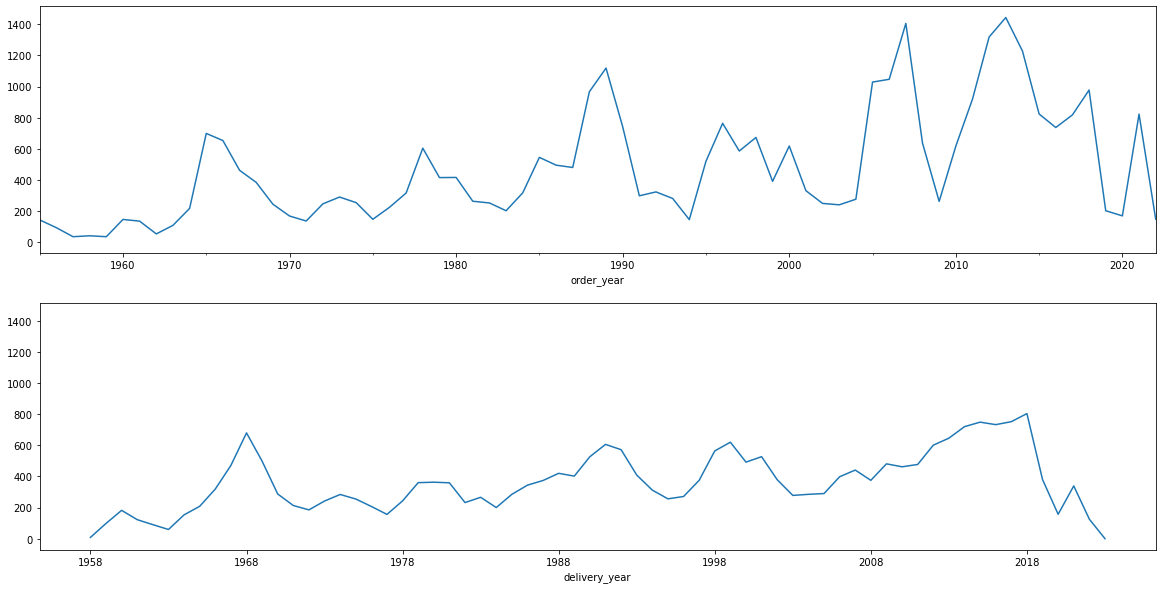

In [54]:
# plot both order and delivery for visual comparation
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10),sharey=True)

ord_year.plot(ax=axes[0])
del_year.plot(ax=axes[1])

Based on the plot above, peak order is around 2014 while peak delivery is around 2018, this is natural as aircraft took a long time to manufacture, test, and deliver. 

The peak and bottom on these graph likely indicates the release of new aircraft model/type.

We can also see that both graph have a decline in recent years. Could be because of several factor such as Covid 19 and perhaps the recent incident regarding Boeing newer model.

In [55]:
# central tendencies for total order
print("Total Order Central Tendencies and Exteme Values")
print("Min :", df['order_total'].min())
print("Max :", df['order_total'].max())
print("Mean :", df['order_total'].mean())
print("Median :", df['order_total'].median())
print("Std :", df['order_total'].std())

print('-'*50)

# central tendencies for total delivery
print("Total Delivery Central Tendencies and Exteme Values")
print("Min :", df['delivery_total'].min())
print("Max :", df['delivery_total'].max())
print("Mean :", df['delivery_total'].mean())
print("Median :", df['delivery_total'].median())
print("Std :", df['delivery_total'].std())

Total Order Central Tendencies and Exteme Values
Min : 0
Max : 200
Mean : 3.618051672072475
Median : 2.0
Std : 6.865312140735035
--------------------------------------------------
Total Delivery Central Tendencies and Exteme Values
Min : 0
Max : 50
Mean : 2.680684487193826
Median : 2.0
Std : 3.289896304896757


From central tendencies above, we can see that the average order is higher than the average delivery while having the same median. This means that there are still a lot of order that have not been delivered, if all the order has been delivered, then the mean should be equal. We are going to prove this later in hypothesis testing.

Max order is 200 while max delivery is 50, this gap would indicate that there is more demand than the supply. If the supply is capable of filling the demand on time, then there should be a year where the delivery is 200 or near 200. But this is understandable since again, aircraft took a long time to manufacture.

**Hypothesis**

H0 = There is no significant difference between the average order and average delivery of all time

H1 = There is significant difference between the average order and average delivery of all time

c:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


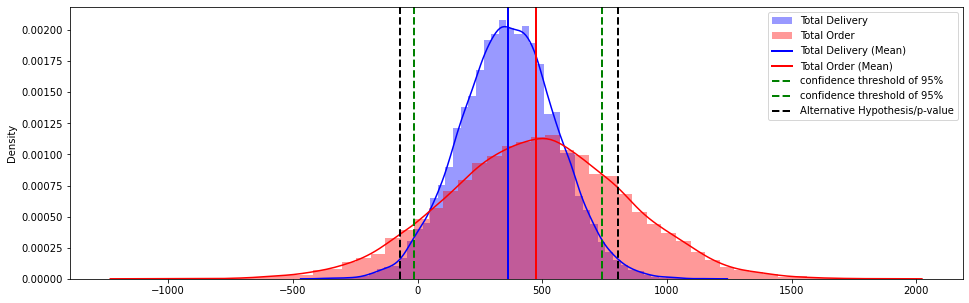

In [56]:
t_stat,p_val = stats.ttest_ind(del_year, ord_year)

# Confidence Internal
del_pop = np.random.normal(del_year.mean(), del_year.std(), 10000)
ord_pop = np.random.normal(ord_year.mean(), ord_year.std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, del_year.mean(), del_year.std())

plt.figure(figsize=(16,5))
sns.distplot(del_pop, label='Total Delivery', color='blue')
sns.distplot(ord_pop, label='Total Order', color='red')
plt.axvline(del_year.mean(), color='blue', linewidth=2, label='Total Delivery (Mean)')
plt.axvline(ord_year.mean(), color='red', linewidth=2, label='Total Order (Mean)')

# confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# p_value/alternate-hypothesis
plt.axvline(del_pop.mean() + t_stat*del_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(del_pop.mean() - t_stat*del_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

# save fig
plt.savefig("Hypothesis1")

Reject H0.

The average of Total Order is significantly higher than the average of Total Delivery. Thus, Boeing still have a lot of order to Deliver.

**Aircaft Model Series**

In [57]:
# group by aircraft model for total order sum
model = df.groupby('model_series')['order_total'].sum()
model = model.sort_values(ascending=False)
model

model_series
737 MAX       5396
737-800       5365
727           1900
MD-80         1384
737-700       1374
737-300       1339
737-200       1160
757-200       1071
707/720       1016
DC-9          1001
787-9          963
777-300ER      852
767-300ER      649
787-8          622
737-900ER      577
DC-8           576
747-400        543
737-400        532
737-500        514
DC-10          487
777-200ER      464
747-200        408
777X           365
777F           289
747-100        275
767-300F       266
MD-11          254
767-200        207
717-200        205
MD-90          199
787-10         196
737-800A       191
BBJ            139
777-200        139
747-8F         138
747-400F       130
767-200ER      120
767-300        112
767-2C         102
757-200PF       82
747-300         81
737-600         69
777-300         67
747-400M        64
757-300         63
777-200LR       62
767-400ER       58
747-8           56
737-900         52
747-400ERF      40
737-100         38
BBJ2            26

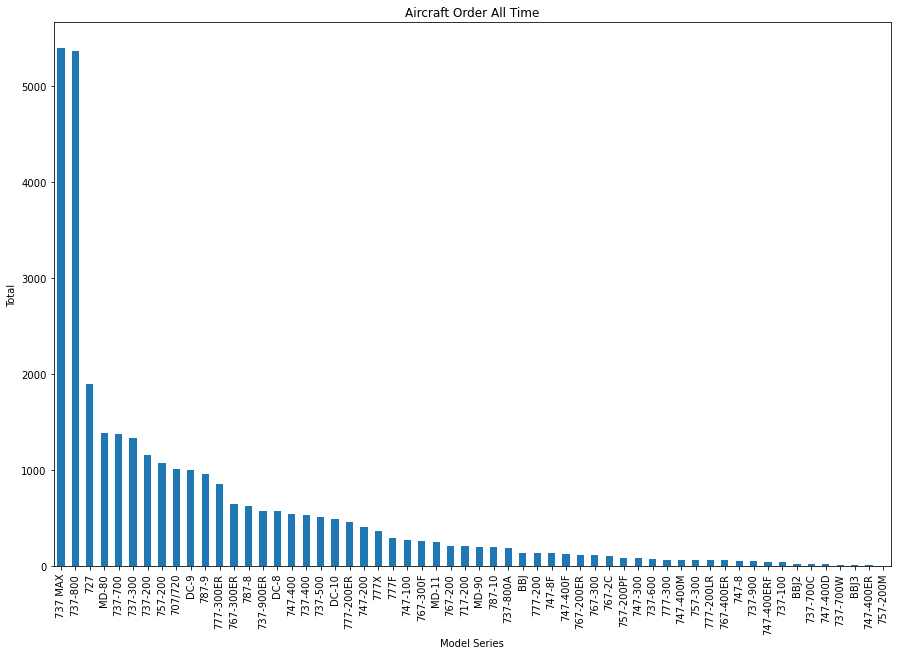

In [58]:
model.plot(kind='bar', figsize=(15, 10))

plt.xlabel('Model Series') 
plt.ylabel('Total')
plt.title('Aircraft Order All Time')

plt.show()

Based on the bar plot above, Boeing 737 MAX is by far the most popular model of all time, followed by model 737-800 and 727.

The amount of 737 MAX and 737-800 ordered is astounding, 737 MAX order is more than triple the amount of 727 which is the third most ordered aircraft.

In [59]:
# query for last 10 years
recent_order = df[(df['order_year'] >= '2012') &
                    (df['order_year'] <= '2022')]
recent_order

,country,customer_name,delivery_year,engine,model_series,order_year,region,delivery_total,order_total
8,Algeria,Air Algerie,2015,CF,737-800,2014-01-01,Africa,2,2
9,Algeria,Air Algerie,2016,CF,737-800,2014-01-01,Africa,6,6
17,Algeria,Air Algerie,2016,CF,737-700C,2014-01-01,Africa,2,2
34,Algeria,Tassili Airlines,2018,CF,737-800,2017-01-01,Africa,3,3
40,Angola,TAAG Angola Airlines,2014,GE,777-300ER,2012-01-01,Africa,1,1
...,...,...,...,...,...,...,...,...,...
9029,Uzbekistan,Uzbekistan Airways,2019,GE,787-8,2016-01-01,Central Asia,2,2
9030,Uzbekistan,Uzbekistan Airways,2021,GE,787-8,2016-01-01,Central Asia,1,1
9050,Vietnam,Bamboo Airways,Undelivered,NS,787-9,2019-01-01,Southeast Asia,0,10
9051,Vietnam,VietJet Air,Undelivered,CF,737 MAX,2016-01-01,Southeast Asia,0,100


Now that we have a dataframe of the last 10 years, we can continue with the exploration

In [60]:
# group by aircraft model for total order sum last 10 years
model_recent = recent_order.groupby('model_series')['order_total'].sum()
model_recent = model_recent.sort_values(ascending=False)
model_recent

model_series
737 MAX      5246
737-800      1149
787-9         540
777X          359
777-300ER     229
737-900ER     193
787-10        163
737-800A      162
767-300F      154
777F          153
767-2C         98
787-8          93
747-8F         56
737-700        49
747-8          18
BBJ             9
737-700C        7
777-200LR       5
767-300ER       4
BBJ2            3
BBJ3            1
Name: order_total, dtype: int32

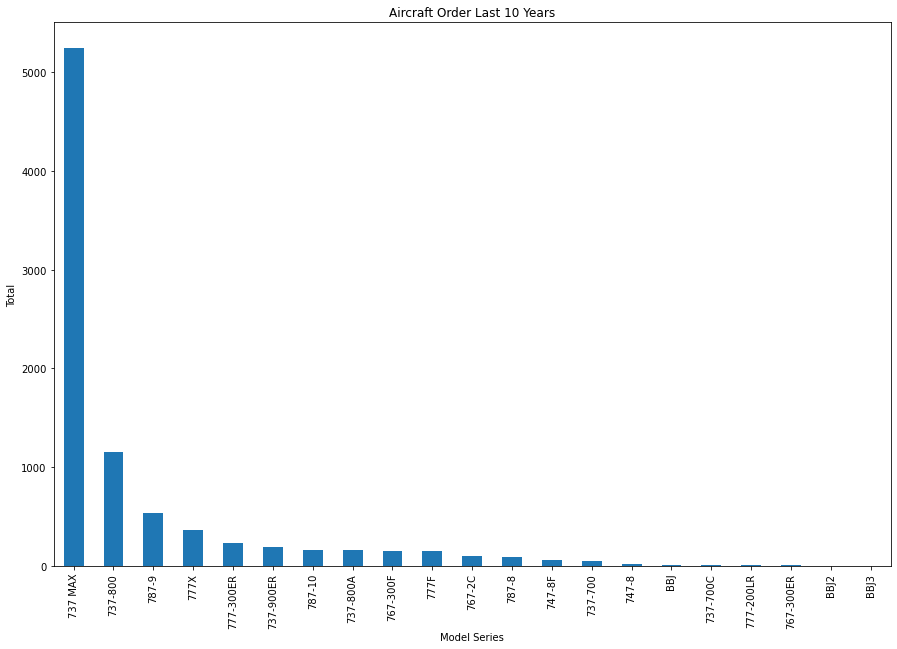

In [61]:
model_recent.plot(kind='bar', figsize=(15, 10))

plt.xlabel('Model Series') 
plt.ylabel('Total')
plt.title('Aircraft Order Last 10 Years')

plt.show()

In the last 10 years, Model 737 MAX is still the highest ordered model, but now model 737-800 falls behind. It is understandable since 737-800 is an olde rmodel compared to 737 MAX. We can also see that the majority of 737 MAX order happens in the last 10 years as well. Perhaps if model 737 MAX does not have recent regrettable issues, the model could have much higher order than it already is.

Since out of all time 737-800 has close total order with 737 MAX, we should compare the central tendencies and extreme values of both model.

In [62]:
# query for 737-800 only
model_7378 = df[df['model_series'] == '737-800']

# query for 737 MAX only
model_737M = df[df['model_series'] == '737 MAX']

print("All Time 737-800 Central Tendencies and Exteme Values")
print("Min :", model_7378['order_total'].min())
print("Max :", model_7378['order_total'].max())
print("Mean :", model_7378['order_total'].mean())
print("Median :", model_7378['order_total'].median())
print("Std :", model_7378['order_total'].std())

print('-'*50)

print("All Time 737 MAX Central Tendencies and Exteme Values")
print("Min :", model_737M['order_total'].min())
print("Max :", model_737M['order_total'].max())
print("Mean :", model_737M['order_total'].mean())
print("Median :", model_737M['order_total'].median())
print("Std :", model_737M['order_total'].std())

All Time 737-800 Central Tendencies and Exteme Values
Min : 0
Max : 50
Mean : 4.500838926174497
Median : 3.0
Std : 4.956062123553566
--------------------------------------------------
All Time 737 MAX Central Tendencies and Exteme Values
Min : 1
Max : 200
Mean : 14.312997347480106
Median : 5.0
Std : 24.999524799366554


Based on the stats above, 737-800 only has at most 50 order in a year, while 737 MAX has up to 200 order in a year. The average order of 737 MAX is also 3 times higher than the average of 737-800, this means that the 737 MAX achieve those number in a much smaller timeframe than 737-800. We are going to test this in hypothesis testing

**Hypothesis**

H0 = There is no significant difference between model 737-800 average order and model 737 MAX average order

H1 = There is significant difference between model 737-800 average order and model 737 MAX average order

c:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


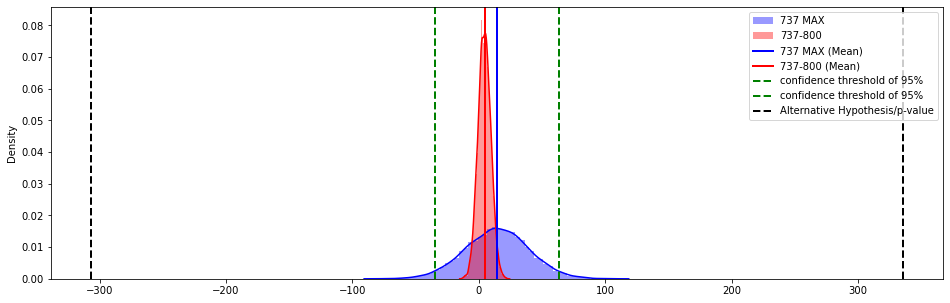

In [63]:
t_stat,p_val = stats.ttest_ind(model_737M['order_total'], model_7378['order_total'])

# Confidence Internal
model_737M_pop = np.random.normal(model_737M['order_total'].mean(), model_737M['order_total'].std(), 10000)
model_7378_pop = np.random.normal(model_7378['order_total'].mean(), model_7378['order_total'].std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, model_737M['order_total'].mean(), model_737M['order_total'].std())

plt.figure(figsize=(16,5))
sns.distplot(model_737M_pop, label='737 MAX', color='blue')
sns.distplot(model_7378_pop, label='737-800', color='red')
plt.axvline(model_737M['order_total'].mean(), color='blue', linewidth=2, label='737 MAX (Mean)')
plt.axvline(model_7378['order_total'].mean(), color='red', linewidth=2, label='737-800 (Mean)')

# confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# p_value/alternate-hypothesis
plt.axvline(model_737M_pop.mean() + t_stat*model_737M_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(model_737M_pop.mean() - t_stat*model_737M_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

# save fig
plt.savefig("Hypothesis2")

Reject H0 
 
This proves that even thought both 737 MAX and 737-800 have similar total order, model 737 MAX have more order per year compared to model 737-800. Thus we could say that model 737 MAX is a success despite having a few obstacle.

**Engine brand use ratio**

In [64]:
# group by engine for total order sum
engine = df.groupby('engine')['order_total'].sum()
engine = engine.sort_values(ascending=False)
engine

engine
CF    15432
PW     8635
GE     5143
RR     1919
NS     1083
BR      137
Name: order_total, dtype: int32

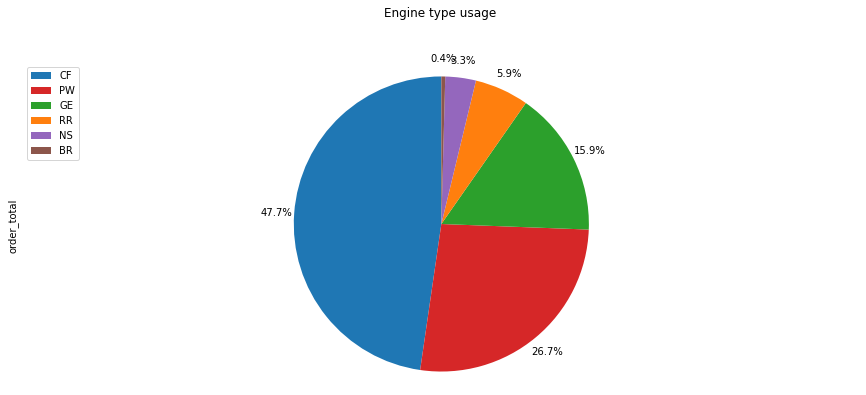

In [65]:
colors_list = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink','tab:gray']

engine.plot(kind='pie',
                figsize=(15, 6),
                autopct='%1.1f%%', 
                startangle=90,           
                labels=None,         # turn off labels on pie chart
                pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                colors=colors_list,  # add custom colors
                )

# scale the title up by 12% to match pctdistance
plt.title('Engine type usage', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=engine.index, loc='upper left') 

plt.show()

Overall, CF (CFM International LEAP) is the most used engine brand, followed closly by PW (Pratt & Whitney). Meanwhile, BR (BMW Rolls & Royce) are used by less than 1%

In [66]:
# Group by engine type count
engine_recent = recent_order.groupby('engine')['order_total'].sum()
engine_recent = engine_recent.sort_values(ascending=False)
engine_recent

engine
CF    6819
GE    1453
RR     219
PW     102
NS      98
Name: order_total, dtype: int32

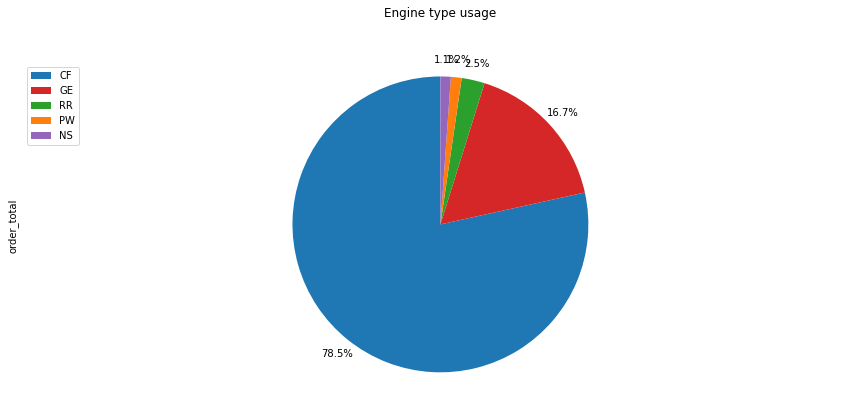

In [67]:
colors_list = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink','tab:gray']

engine_recent.plot(kind='pie',
                figsize=(15, 6),
                autopct='%1.1f%%', 
                startangle=90,          
                labels=None,         # turn off labels on pie chart
                pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                colors=colors_list,  # add custom colors
                )

# scale the title up by 12% to match pctdistance
plt.title('Engine type usage', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=engine_recent.index, loc='upper left') 

plt.show()

In the last 10 years, Boeing does not use BR engine anymore. PW, RR, and NS engine is also barely used in Boeing aircraft for the last 10 years. The majority of engine used in the last 10 years is from CF at 78.5% total usage. CF engine is the most used in engine in both last 10 years and all time

**Order by Customer**

In [68]:
# Groupby cust for delivery and order
cust_order = df.groupby('customer_name',sort=True,as_index=True)[['delivery_total','order_total']].sum().copy()
cust_order_tail = cust_order.sort_values('order_total', ascending=True).tail(10)
cust_order_tail

,delivery_total,order_total
customer_name,,
Japan Airlines,395,420
"All Nippon Airways Co., Ltd.",385,421
Lion Air,200,458
NAS Aviation Services LLC,567,674
Ryanair,597,741
International Lease Finance Co,799,839
Delta Air Lines,950,1044
Southwest Airlines,841,1271
American Airlines,1299,1450


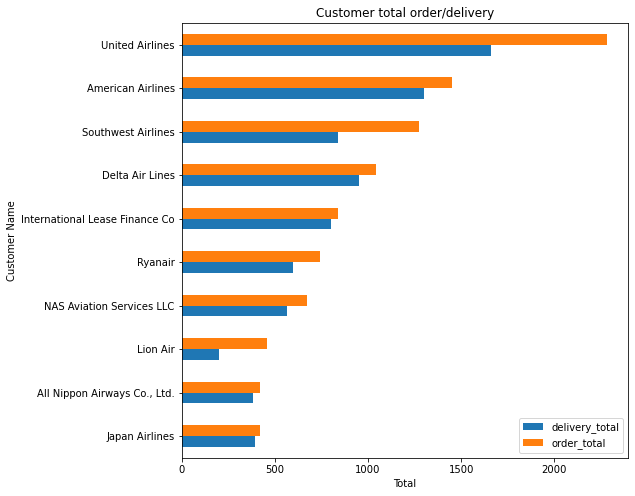

In [69]:
# horizontal bar plot for total order/deliveries of top customer
cust_order_tail.plot(kind='barh', figsize=(8, 8))

plt.xlabel('Total') 
plt.ylabel('Customer Name')
plt.title('Customer total order/delivery')

plt.show()

Based on the table and plot above, 

Overall, United Airlines has the highest order and delivery over the years with almost 2300 total order, followed by American Airlines at 1450 total order. Based on the graph, there seems to be a lot of orders that has not been delivered to United Airlines, Southwest Airlines, and Lion Air

In [70]:
# Groupby cust for delivery and order for last 10 years
cust_order_recent = recent_order.groupby('customer_name',sort=True,as_index=True)[['delivery_total','order_total']].sum()
cust_order_recent = cust_order_recent.sort_values('order_total', ascending=True).tail(10)
cust_order_recent

,delivery_total,order_total
customer_name,,
American Airlines,93,199
VietJet Air,0,200
AerCap,19,202
Jet Airways,4,242
flydubai,39,262
Lion Air,22,280
Air Lease Corporation,79,287
Southwest Airlines,66,335
Ryanair,249,393


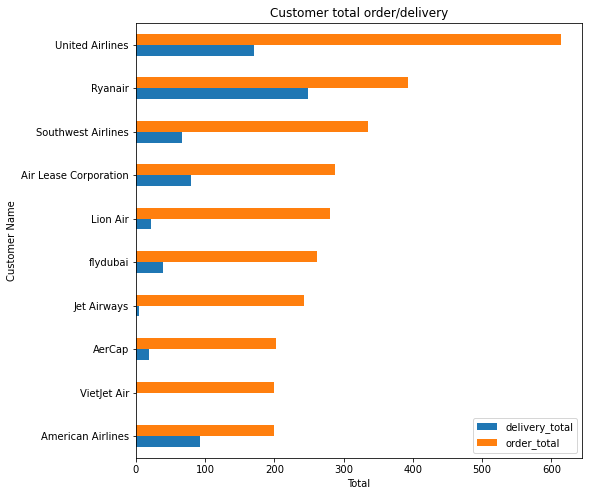

In [71]:
# horizontal bar plot for total order/deliveries of top customer
cust_order_recent.plot(kind='barh', figsize=(8, 8))

plt.xlabel('Total') 
plt.ylabel('Customer Name')
plt.title('Customer total order/delivery')

plt.show()

In the last 10 years, United Airlines still order the most aircraft to boeing. United Airlines, American Airlines, Ryan Air, Southwest Airlines, Lion Air still order a lot of aircraft, proving them to be a loyal customer.

We can see that a lot of the orders for the last 10 years has not been delivered. Perhaps this kind of long delivery is normal for aircraft manufacturer, in order to determine it for sure, further analysis with comparison aganinst other aircraft manufacturer regarding delivery time must be made.

## Overall Analysis

Overall, from all the analysis that has been completed, it can be concluded that:
1. Boeing's average total order is higher than its average total delivery, which means that Boeing still have a lot of unfilled orders.
2. Boeing 737 MAX is the most ordered aircraft of the last 10 years and of all time. Presummably it just recently surpass 737-800 order of all time. This means that 737 MAX is a successful product.
3. The most used engine of the lsat 10 years and of all time is CF (CFM International Leap), and it is likely that this will still be the case for a few years later.
4. United Airlines, American Airlines, Ryan Air, Southwest Airlines, Lion Air are a loyal customer to Boeing. A lot of the unfilled orders is within the last 10 years. 